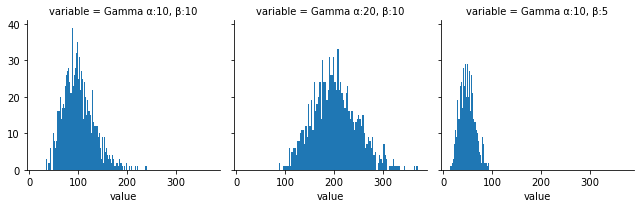

In [2]:
"""
Gamma Family

Once again the overall shape of any member of the Gamma family depends on the balance between these two parameters. 
The larger α for a fixed β, the more the probability density function will concentrate towards positive infinity. 
The larger β for a fixed α, the more it will concentrate towards zero.
"""

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Shape - α
# Inverse Scale or Rate - β

size = 1000
gamma_dict = {
    "Gamma α:10, β:10": np.random.gamma(10, 10, size),
    "Gamma α:20, β:10": np.random.gamma(20, 10, size),
    "Gamma α:10, β:5": np.random.gamma(10, 5, size)
}

gamma_df = pd.DataFrame.from_dict(gamma_dict)
melted_gamma = gamma_df.melt()

Graph = sns.FacetGrid(melted_gamma, col="variable", sharex=True)
Graph.map(plt.hist, "value", cumulative=False, bins=100)

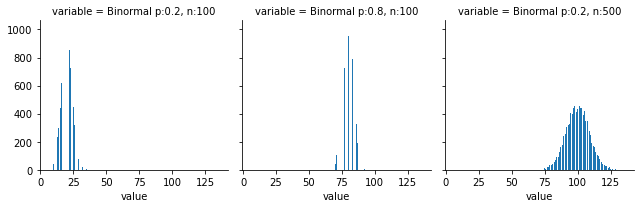

In [10]:
"""
Binomial Family

The larger N the stronger this concentration is relative to the mean.

Mean = n*p
Variance = (1−p)*n*p
"""

# Probability of success - p
# Number of trials - n

size = 10000
binormal_dict = {
    "Binormal p:0.2, n:100": np.random.binomial(100, 0.2, size),
    "Binormal p:0.8, n:100": np.random.binomial(100, 0.8, size),
    "Binormal p:0.2, n:500": np.random.binomial(500, 0.2, size)
}

binormal_df = pd.DataFrame.from_dict(binormal_dict)
melted_binormal = binormal_df.melt()

Graph = sns.FacetGrid(melted_binormal, col="variable", sharex=True)
Graph.map(plt.hist, "value", cumulative=False, bins=100)

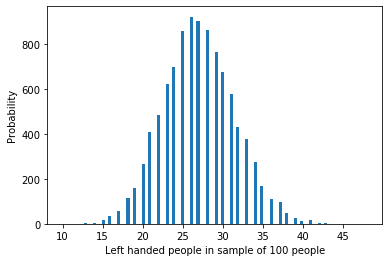

In [17]:
"""
Binomial example

For example, a sample of 100 people shows 27 who are left handed, and 73 who are right handed. 
Then p = 27/100 = 27%. 
0.27*100 = 27, so the binomial distribution should be used in this case.
"""
people = 100
left_handed = 27
right_handed = people - left_handed
p_left_handed = left_handed / people

data = np.random.binomial(people, p_left_handed, size)
plt.hist(data, bins=100)
plt.xlabel("Left handed people in sample of {} people".format(people))
plt.ylabel("Probability")
plt.show()

Text(-2.6999999999999957, 0.5, 'Probability of failure at next trial')

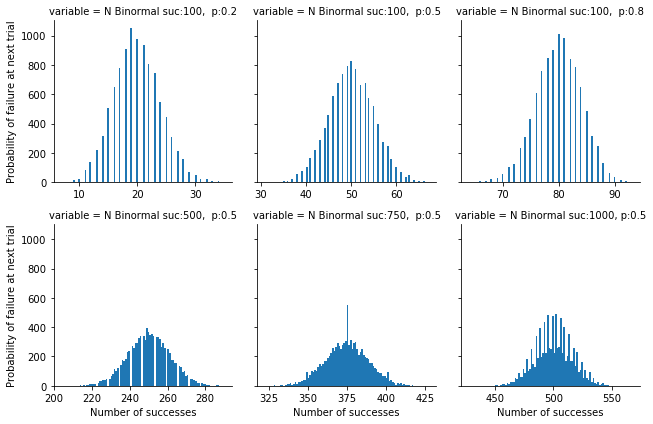

In [44]:
"""
Negative binomial family
"""

# Probability of success - p
# Number of succeses - n

size = 10000
n_binormal_dict = {
    "N Binormal suc:100,  p:0.2": np.random.binomial(100, 0.2, size),
    "N Binormal suc:100,  p:0.5": np.random.binomial(100, 0.5, size),
    "N Binormal suc:100,  p:0.8": np.random.binomial(100, 0.8, size),
    "N Binormal suc:500,  p:0.5": np.random.binomial(500, 0.5, size),
    "N Binormal suc:750,  p:0.5": np.random.binomial(750, 0.5, size),
    "N Binormal suc:1000, p:0.5": np.random.binomial(1000, 0.5, size)
}

n_binormal_df = pd.DataFrame.from_dict(n_binormal_dict)
melted_n_binormal = n_binormal_df.melt()
melted_n_binormal.columns = ["variable", "Number of successes"]
# Number of succeses
Graph = sns.FacetGrid(melted_n_binormal, col="variable", sharex=False, col_wrap=3)
Graph = Graph.map(plt.hist, "Number of successes", cumulative=False, bins=100)

Graph.axes[0].set_ylabel("Probability of failure at next trial")
Graph.axes[3].set_ylabel("Probability of failure at next trial")

Covariance
[[3.99991474 4.00763345]
 [4.00763345 8.00999093]]


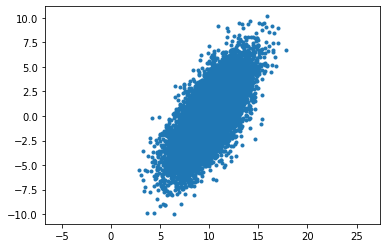

In [71]:
"""
Multivariate normal distribution
"""

x_mean = 10
x_std_dev = 2
y_mean = 0
y_std_dev = 2
mean = [x_mean, y_mean]
size = 10000
x = np.random.normal(x_mean, x_std_dev, 100000)
y = x + np.random.normal(y_mean, y_std_dev, 100000)

covariance = np.cov(x, y)
print("Covariance")
print(covariance)


x_plt, y_plt = np.random.multivariate_normal(mean, covariance, size).T
plt.plot(x_plt, y_plt, ".")
plt.axis('equal')
plt.show()

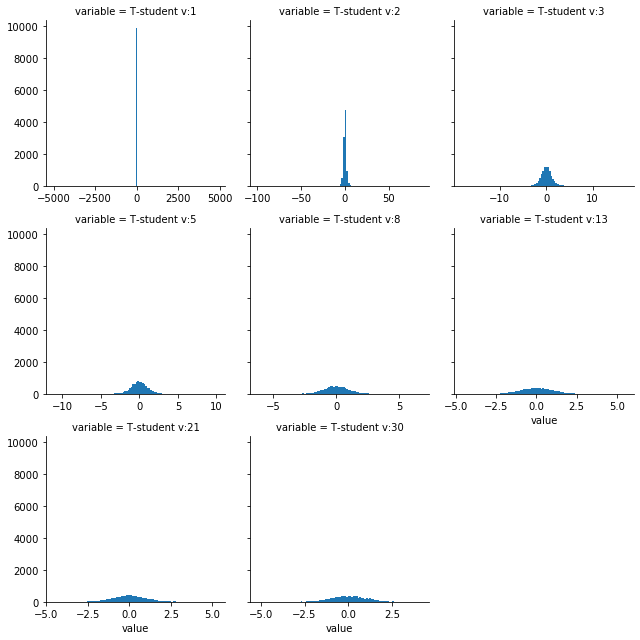

In [79]:
"""
T-student distribution
"""

size = 10000
n_binormal_dict = {
    "T-student v:1": np.random.standard_t(1, size),
    "T-student v:2": np.random.standard_t(2, size),
    "T-student v:3": np.random.standard_t(3, size),
    "T-student v:5": np.random.standard_t(5, size),
    "T-student v:8": np.random.standard_t(8, size),
    "T-student v:13": np.random.standard_t(13, size),
    "T-student v:21": np.random.standard_t(21, size),
    "T-student v:30": np.random.standard_t(30, size)
}

tstudent_df = pd.DataFrame.from_dict(n_binormal_dict)
melted_tstudent = tstudent_df.melt()

Graph = sns.FacetGrid(melted_tstudent, col="variable", sharex=False, col_wrap=3)
Graph = Graph.map(plt.hist, "value", cumulative=False, bins=100)